In [17]:
%load_ext autoreload
%autoreload 2

In [18]:
import numpy as np
import os
from matplotlib import pyplot as plt

import codecs

from pySurf.data2D_class import Data2D
from pySurf.data2D import plot_data
from dataIO.fn_add_subfix import fn_add_subfix
from pyProfile.psd import plot_psd, psd_units

import pdb

In [19]:
import os 
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage

from pySurf.data2D_class import Data2D
from pySurf.data2D import plot_data
from dataIO.fn_add_subfix import fn_add_subfix
from pySurf.fit_cylinder import fit_cylinder, fit_cone
from pySurf.points import resample_grid, subtract_points, plot_points, points_autoresample

from pySurf.scripts.dlist import Dlist,load_dlist

from plotting.backends import maximize
from dataIO.span import span

import inspect
import warnings
import pickle
warnings.filterwarnings('ignore')

In [20]:
from pyProfile.profile import save_profile,crop_profile
from scipy.stats import binned_statistic
from pySurf.readers.instrumentReader import matrixdat_reader,matrixZygo_reader, matrix_reader, matrix4D_reader

In [26]:
from pySurf.readers.nid_reader import read_nid

In [27]:
pwd

'G:\\My Drive\\progetti\\pySurf\\tutorials'

In [91]:
from pySurf.readers.format_reader import test_read_nid, read_nid, nid_reader, nid_reader2
datafolder = r'G:\My Drive\progetti\c_overcoating\esperimenti\20201127_batch05_IrCr\20210224_dopamine_clean'
fn = 'Image00053.nid'
file_name =  os.path.join(datafolder,fn)

a = read_nid(file_name)
h = read_nid(file_name,header=True)
#d = test_read_nid(file_name)

> c:\users\kovor\documents\python\pyxtel\pyxsurf\pysurf\readers\format_reader.py(419)read_nid()
-> logging.info('option '+cgtag+' not found')


(Pdb)  c


In [122]:
from dataIO.config.make_config import string_to_config
p = string_to_config(h)

from pySurf.readers.format_reader import make_channel_tags
make_channel_tags(h)

['Gr0-Ch1',
 'Gr0-Ch2',
 'Gr0-Ch3',
 'Gr0-Ch4',
 'Gr0-Ch5',
 'Gr0-Ch6',
 'Gr0-Ch7',
 'Gr0-Ch8',
 'Gr1-Ch1',
 'Gr1-Ch2',
 'Gr1-Ch3',
 'Gr1-Ch4',
 'Gr1-Ch5',
 'Gr1-Ch6',
 'Gr1-Ch7',
 'Gr1-Ch8']

In [196]:
print(len(read_nid(file_name)))

3


In [197]:
print(read_nid(file_name,read_tags=True))  # without index reads all channels
d=read_nid(file_name)  # without index reads first channel 
print("len:",len(d))

['Gr0-Ch1', 'Gr0-Ch2', 'Gr0-Ch3', 'Gr0-Ch7', 'Gr1-Ch1', 'Gr1-Ch2', 'Gr1-Ch3', 'Gr1-Ch7']
len: 3


In [201]:
ch_names = read_nid(file_name,[1,2],read_tags=True)
b = read_nid(file_name,[1,2])  #legge piu' di uno scan
print("read",ch_names)
print("len:",len(b))

read ['Gr0-Ch2', 'Gr0-Ch3']
len: 2


In [135]:
infolder = r'G:\My Drive\progetti\c_overcoating\esperimenti\20201127_batch05_IrCr\20210423_thicknessTest'
outfolder = 'test_output'
outdir = '.' # per ora qui #r'G:\My Drive\progetti\c_overcoating\esperimenti\results\SPIE2021'  #os.path.join(datafolder,'results')

In [136]:
fl = [f for f in os.listdir(infolder) if os.path.splitext(f)[-1] == '.nid']

In [137]:
fl

['01_tfAu_001um.nid',
 '02_tfAu_001um.nid',
 '03_tfAu_010.um.nid',
 '04_tfAu_040.um.nid',
 '05_tfAu_040.um.nid',
 '06_tfAu_005.um.nid',
 '07_tfAu_010.um.nid',
 '08_tfAu_010.um.nid',
 '09_tfAu_001um.nid',
 '10_tfAu_001um.nid',
 '11_tfAu_010um.nid',
 '12_tfAu_010um.nid',
 '13_tfIr_001um.nid',
 '14_tfIr_040um.nid',
 '15_tfIr_001um.nid']

In [216]:
from pySurf.readers.instrumentReader import nid_reader
d = Data2D(fn,units=['um','um','nm'],scale=[1000000.,1000000.,1000000000.],
           name=os.path.basename(fn),reader=nid_reader,index=0) 

first argument is string, use it as filename


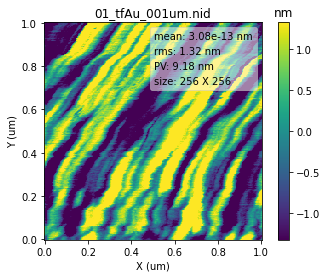

In [217]:
d.level(axis=1).plot()

In [31]:
from pySurf.readers.instrumentReader import nid_reader
d = Data2D(units=['um','um','nm'],scale=[1000000.,1000000.,1000000000.],
           name=os.path.basename(fn),reader=nid_reader) 

In [32]:
d = Data2D(units=['um','um','nm'],scale=[1000000.,1000000.,1000000000.],
           name=os.path.basename(fn)) # .nid format is unambiguous, can guess reader

In [33]:
plt.figure()
d.level(axis=1).plot()

AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
['01_dop4h02_001um.nid',
'04_dop4h02_010um.nid',
'06_dop4h01_001um.nid',
'07_dop4h01_001um.nid',
'Image00053.nid',    #teco353 10  dopamine
'Image00054.nid',    #teco 50 
'Image00056.nid',    #teco 100
'Image00083.nid',    #teco 1
'Image00084.nid',    #teco 1
'Image00086.nid',    #038-03 1   IrCr
'Image00087.nid',    #038-03 1
'Image00088.nid',    #038-03 10
'Image00089.nid',    #038-03 50
'Image00090.nid',    #266-06 1   Ir
'Image00091.nid',    #266-06 10
'Image00092.nid',    #266-06 10 repeat
'Image00093.nid',    #038-10 1  #2542 Ir TD
'Image00094.nid',    #038-10 10
'Image00095.nid',    #038-10 50
'Image00096.nid',    #126-03 1  IrCr TD
'Image00097.nid',    #126-03 10
'Image00098.nid']    #126-03 50 parziale